# Imports

In [1]:
import os.path as osp

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
def rational(X, params):
    params = np.asarray(params)
    if params.ndim == 1:
        return np.clip((params[0] * X + params[1]) / (X ** 2 + params[2] * X + params[3]), -100, 100)
    if params.ndim == 2:
        return np.clip(
            (params[:, 0] * X[:, None] + params[:, 1]) / (X[:, None] ** 2 + params[:, 2] * X[:, None] + params[:, 3]),
            -100,
            100,
        )

def loss(func, X, params, y_true, reduction=True):
    approx = func(X, params)
    if params.ndim == 1:
        if reduction:
            return np.sum((approx - y_true) ** 2)
        else:
            return approx - y_true
    if params.ndim == 2:
        return np.sum((approx - y_true[:, None]) ** 2, axis=0)


# Load data

Best loss is achieved when initial values are true values (except for Particle Swarm algorithm)

In [4]:
df_true = pd.read_csv('task4_true.csv')
df_approx_all = pd.read_csv('task4.csv', converters={"params": eval})
df_approx_all['capture_one'] = df_approx_all['loss'] < 150000
df_approx_all.sort_values('loss')

,method,approx_func,loss,init_params,params,iterations,try_num,true_init,capture_one
22,diff_ev,rational,1002.129197,"[0, 1, -3, 2]","[0.00807970605601817, 0.9875810680470644, -3.0...",86,5,True,True
20,nelder_mead,rational,1004.345145,"[0, 1, -3, 2]","[0.00023733210994855692, 0.9993221679426562, -...",110,5,True,True
21,lm,rational,1010.388080,"[0, 1, -3, 2]","[0.0007475516441989011, 0.9990075510289683, -3...",2,5,True,True
2,diff_ev,rational,134881.031569,"[2.815769720080599, -2.021267391315999, 0.2889...","[-2.0143348121932183, -0.34952490319563645, 0....",64,0,False,True
23,part_swarm,rational,135121.126625,"[0, 1, -3, 2]","[-1.007809217322225, 0.4961436917723757, -1.49...",1000,5,True,True
0,nelder_mead,rational,139708.758120,"[2.815769720080599, -2.021267391315999, 0.2889...","[-1.2735730498221827, 1.272611789649346, -2.00...",1000,0,False,True
12,nelder_mead,rational,140006.993728,"[1.990334676057631, -0.8718264035318466, -2.36...","[0.6938540162214358, -1.1462839235557762, -3.6...",445,3,False,True
16,nelder_mead,rational,184929.524051,"[-0.12534711242473673, 2.238979024031452, 2.75...","[-0.23716572505253541, 0.03454156807481437, -1...",544,4,False,False
3,part_swarm,rational,190609.093077,"[2.815769720080599, -2.021267391315999, 0.2889...","[-2.0975174435300206, 2.0949826562954756, -1.9...",1000,0,False,False
19,part_swarm,rational,192695.132244,"[-0.12534711242473673, 2.238979024031452, 2.75...","[-2.1693585121181287, 2.17168829419498, -2.014...",1000,4,False,False


Interesting, that all methods, while initialized with the same values, sometimes come to the close solutions, but not always.

In [5]:
df_approx_all.sort_values('try_num')

,method,approx_func,loss,init_params,params,iterations,try_num,true_init,capture_one
0,nelder_mead,rational,139708.758120,"[2.815769720080599, -2.021267391315999, 0.2889...","[-1.2735730498221827, 1.272611789649346, -2.00...",1000,0,False,True
1,lm,rational,267489.693589,"[2.815769720080599, -2.021267391315999, 0.2889...","[-546.1149085645459, 289.285263956519, 534.283...",6,0,False,False
2,diff_ev,rational,134881.031569,"[2.815769720080599, -2.021267391315999, 0.2889...","[-2.0143348121932183, -0.34952490319563645, 0....",64,0,False,True
3,part_swarm,rational,190609.093077,"[2.815769720080599, -2.021267391315999, 0.2889...","[-2.0975174435300206, 2.0949826562954756, -1.9...",1000,0,False,False
4,nelder_mead,rational,227237.901797,"[0.034056068914099846, -1.6546317543517866, -2...","[0.03528299719643267, -0.07229037300670804, -3...",790,1,False,False
5,lm,rational,262394.983686,"[0.034056068914099846, -1.6546317543517866, -2...","[0.46454498958804563, -1.3034485469388015, -3....",9,1,False,False
6,diff_ev,rational,266346.306046,"[0.034056068914099846, -1.6546317543517866, -2...","[-3.1489565186336463, 1.7386362693589232, -2.0...",64,1,False,False
7,part_swarm,rational,240152.612546,"[0.034056068914099846, -1.6546317543517866, -2...","[0.7338582656111003, -1.4797100152594056, -3.9...",1000,1,False,False
10,diff_ev,rational,266983.870140,"[2.088933656501916, -2.7496325254362883, -0.99...","[0.20893345939041819, -1.5819568021176011, -2....",72,2,False,False
11,part_swarm,rational,225677.118138,"[2.088933656501916, -2.7496325254362883, -0.99...","[-1.0022177916583255, 0.9889896419096769, -2.0...",1000,2,False,False


In [6]:
pd.DataFrame(df_approx_all[~df_approx_all['true_init']].groupby('method').agg({'loss': np.mean, 'capture_one': np.sum})).sort_values('loss')

,loss,capture_one
method,,
nelder_mead,191946.094912,2
part_swarm,220497.553318,0
diff_ev,240531.558531,1
lm,268380.503548,0


In [7]:
df_approx = df_approx_all[~df_approx_all['true_init']].sort_values('loss').groupby('method').head(1)
df_approx

,method,approx_func,loss,init_params,params,iterations,try_num,true_init,capture_one
2,diff_ev,rational,134881.031569,"[2.815769720080599, -2.021267391315999, 0.2889...","[-2.0143348121932183, -0.34952490319563645, 0....",64,0,False,True
0,nelder_mead,rational,139708.758120,"[2.815769720080599, -2.021267391315999, 0.2889...","[-1.2735730498221827, 1.272611789649346, -2.00...",1000,0,False,True
3,part_swarm,rational,190609.093077,"[2.815769720080599, -2.021267391315999, 0.2889...","[-2.0975174435300206, 2.0949826562954756, -1.9...",1000,0,False,False
5,lm,rational,262394.983686,"[0.034056068914099846, -1.6546317543517866, -2...","[0.46454498958804563, -1.3034485469388015, -3....",9,1,False,False


In [8]:
df_approx_true = df_approx_all[df_approx_all['true_init']]
df_approx_true

,method,approx_func,loss,init_params,params,iterations,try_num,true_init,capture_one
20,nelder_mead,rational,1004.345145,"[0, 1, -3, 2]","[0.00023733210994855692, 0.9993221679426562, -...",110,5,True,True
21,lm,rational,1010.388080,"[0, 1, -3, 2]","[0.0007475516441989011, 0.9990075510289683, -3...",2,5,True,True
22,diff_ev,rational,1002.129197,"[0, 1, -3, 2]","[0.00807970605601817, 0.9875810680470644, -3.0...",86,5,True,True
23,part_swarm,rational,135121.126625,"[0, 1, -3, 2]","[-1.007809217322225, 0.4961436917723757, -1.49...",1000,5,True,True


# Plot data

In [9]:
plt.rcParams['figure.figsize'] = (10, 6)
METHODS = {'nelder_mead': 'Nelder-Mead',
           'lm': 'Levenberg-Marquardt',
           'diff_ev': 'Differential Evolution',
           'part_swarm': 'Particle Swarm'}

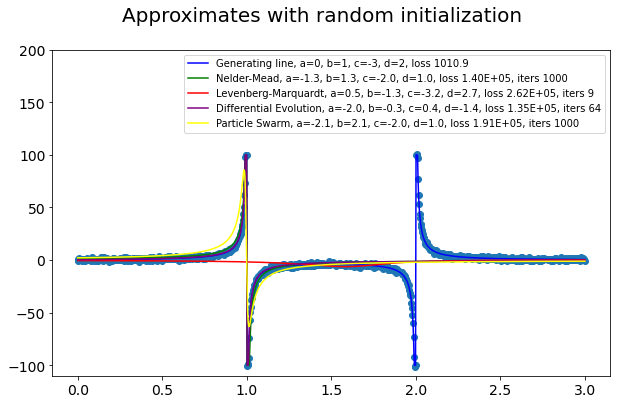

In [10]:
plt.scatter(df_true['X'], df_true['y'])
true_params = np.asarray([0, 1, -3, 2])
true_loss = loss(rational, df_true['X'], true_params, df_true['y'])
plt.plot(df_true['X'], df_true['y_clean'], c='blue', 
         label=f'Generating line, a={true_params[0]}, b={true_params[1]}, c={true_params[2]}, d={true_params[3]}, loss {true_loss:.1f}')
for method, color in zip(['nelder_mead', 'lm', 'diff_ev', 'part_swarm'],
                         ['green', 'red', 'purple', 'yellow']):
    row = df_approx[df_approx['method'] == method]
    loss_val = row['loss'].values[0]
    iters = row['iterations'].values[0]
    params = row['params'].values[0]
    approx_y = rational(df_true['X'], params)
    plt.plot(df_true['X'], approx_y, c=color, 
         label=f'{METHODS[method]}, a={params[0]:.1f}, b={params[1]:.1f}, c={params[2]:.1f}, d={params[3]:.1f}, loss {loss_val:.2E}, iters {iters}')

plt.ylim([-110, 200])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.suptitle('Approximates with random initialization', fontsize=20)
plt.legend();

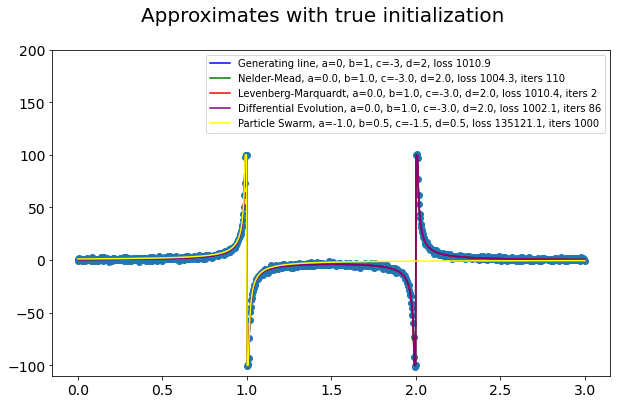

In [11]:
plt.scatter(df_true['X'], df_true['y'])
true_params = np.asarray([0, 1, -3, 2])
true_loss = loss(rational, df_true['X'], true_params, df_true['y'])
plt.plot(df_true['X'], df_true['y_clean'], c='blue', 
         label=f'Generating line, a={true_params[0]}, b={true_params[1]}, c={true_params[2]}, d={true_params[3]}, loss {true_loss:.1f}')
for method, color in zip(['nelder_mead', 'lm', 'diff_ev', 'part_swarm'],
                         ['green', 'red', 'purple', 'yellow']):
    row = df_approx_true[df_approx_true['method'] == method]
    loss_val = row['loss'].values[0]
    iters = row['iterations'].values[0]
    params = row['params'].values[0]
    approx_y = rational(df_true['X'], params)
    plt.plot(df_true['X'], approx_y, c=color, 
         label=f'{METHODS[method]}, a={params[0]:.1f}, b={params[1]:.1f}, c={params[2]:.1f}, d={params[3]:.1f}, loss {loss_val:.1f}, iters {iters}')

plt.ylim([-110, 200])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.suptitle('Approximates with true initialization', fontsize=20)
plt.legend();